<a href="https://colab.research.google.com/github/SailaJuliaa/Proyek_ML/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Saila_Julia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**

1.   Dataset diperoleh dari Kaggle dengan judul Bank transaction Dataset for Fraud Detection
2.   Dataset tidak memiliki label
      Jumlah baris :  2,512 samples of transaction data
      Tipe Data : Mengandung data kategorikal dan numerikal
      *Numerical* : TransactionAmount, TransactionDate, IP Adress

      *Kategorical* : TransactionType, Location, Channel
      
      *Unique* : TransactionID, AccountID, DeviceID, MerchantID
3.    Dataset digunakan dalam latihan clustering untuk Menganalisis kebiasaan belanja konsumen dan perilaku finansial

Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import SelectKBest, f_classif
from yellowbrick.cluster import KElbowVisualizer
import warnings
import math
warnings.filterwarnings("ignore")

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
df_bank = pd.read_csv("https://raw.githubusercontent.com/SailaJuliaa/Proyek_ML/refs/heads/main/bank_transactions_data_2.csv")
df_bank.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
df_bank.shape

(2512, 16)

In [ ]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [ ]:
df_bank.isnull().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


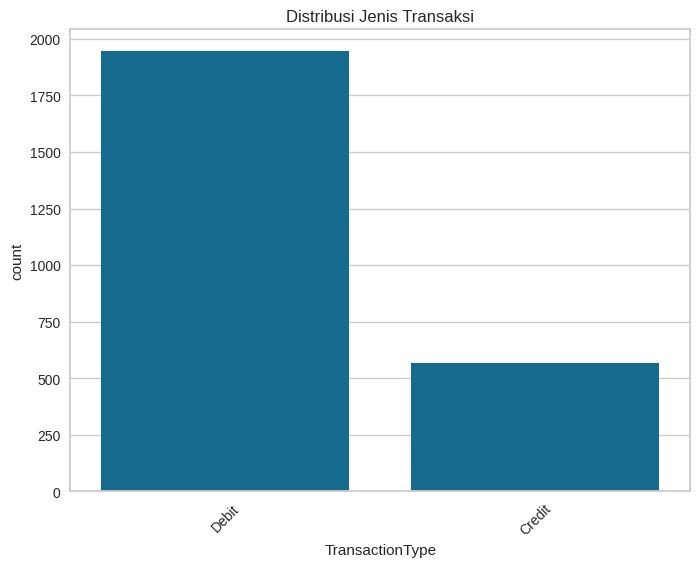

In [ ]:
# Memeriksa distribusi data kategorikal
if 'TransactionType' in df_bank.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x='TransactionType', data=df_bank)
    plt.title('Distribusi Jenis Transaksi')
    plt.xticks(rotation=45)
    plt.show()

Descriptive statistics for TransactionAmount:
count    2512.000000
mean      297.593778
std       291.946243
min         0.260000
25%        81.885000
50%       211.140000
75%       414.527500
max      1919.110000
Name: TransactionAmount, dtype: float64
--------------------
Descriptive statistics for CustomerAge:
count    2512.000000
mean       44.673965
std        17.792198
min        18.000000
25%        27.000000
50%        45.000000
75%        59.000000
max        80.000000
Name: CustomerAge, dtype: float64
--------------------
Descriptive statistics for TransactionDuration:
count    2512.000000
mean      119.643312
std        69.963757
min        10.000000
25%        63.000000
50%       112.500000
75%       161.000000
max       300.000000
Name: TransactionDuration, dtype: float64
--------------------
Descriptive statistics for LoginAttempts:
count    2512.000000
mean        1.124602
std         0.602662
min         1.000000
25%         1.000000
50%         1.000000
75%         1.0

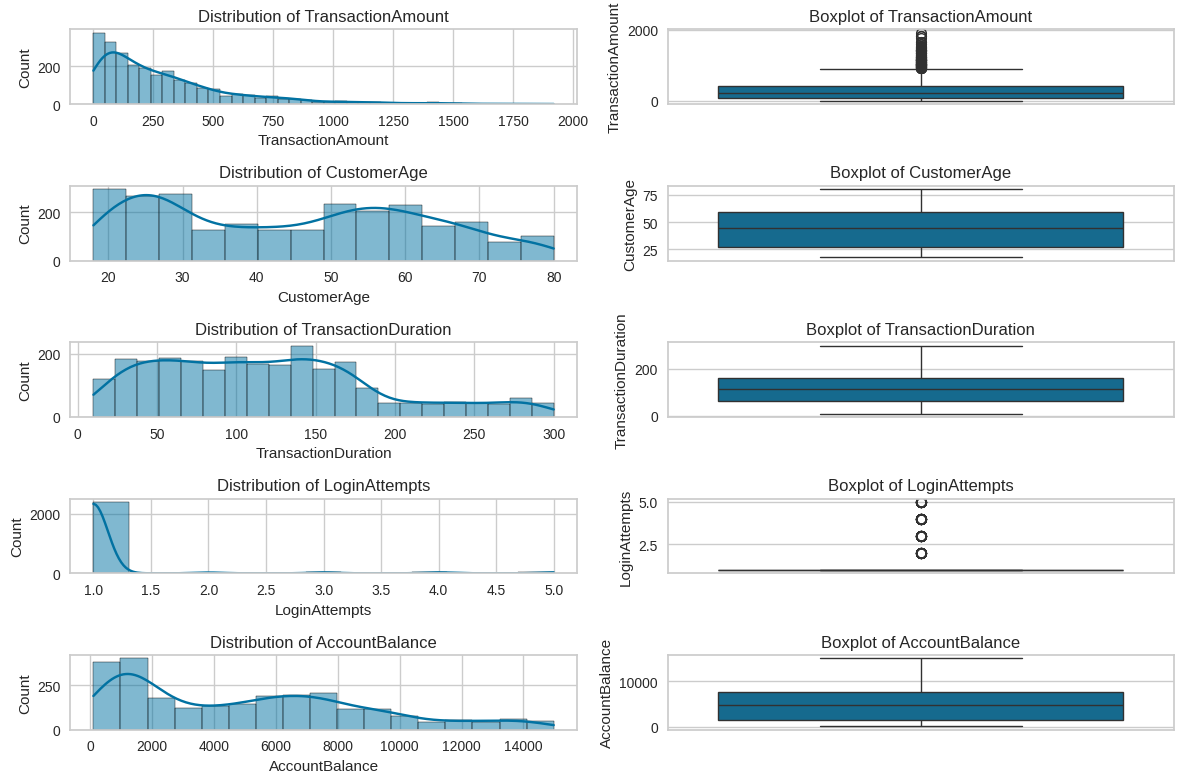

In [ ]:
# Memeriksa distribusi data numerik dengan statistik deskritif

numerical_cols = df_bank.select_dtypes(include=np.number).columns
for col in numerical_cols:
  print(f"Descriptive statistics for {col}:")
  print(df_bank[col].describe())
  print("-" * 20)


plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 2, 2 * i + 1)
    sns.histplot(df_bank[col], kde=True)
    plt.title(f'Distribution of {col}')

    plt.subplot(len(numerical_cols), 2, 2 * i + 2)
    sns.boxplot(y=df_bank[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [ ]:
print("jumlah duplikasi: ", df_bank.duplicated().sum())

jumlah duplikasi:  0


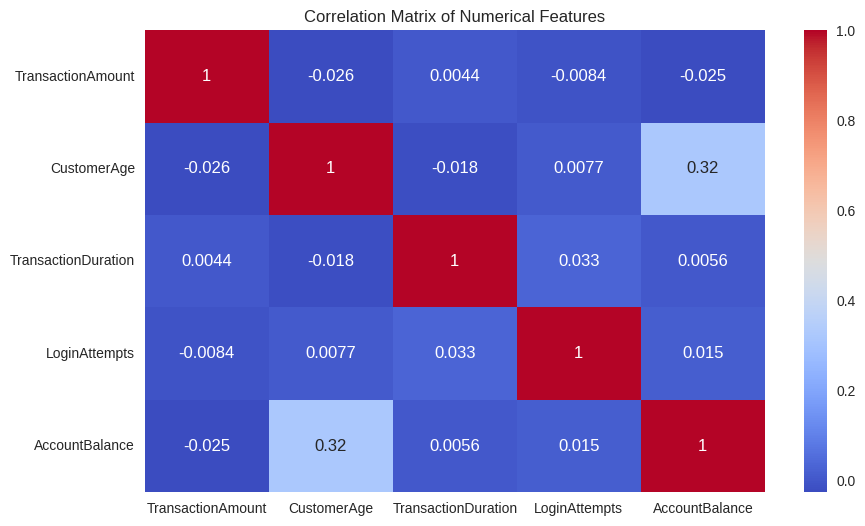

In [ ]:
# Menggunakan heatmap untuk menemukan korelasi matriks
plt.figure(figsize=(10, 6))

numerical_features = df_bank.select_dtypes(include=np.number) # This line is added

sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [ ]:
df_bank.copy()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,2024-11-04 08:12:22


In [ ]:
# Mengubah tipe Data
datetime_col = ["TransactionDate", "PreviousTransactionDate"]

for columns in datetime_col:
   df_bank[columns] = pd.to_datetime(df_bank[columns])

In [ ]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2512 non-null   object        
 1   AccountID                2512 non-null   object        
 2   TransactionAmount        2512 non-null   float64       
 3   TransactionDate          2512 non-null   datetime64[ns]
 4   TransactionType          2512 non-null   object        
 5   Location                 2512 non-null   object        
 6   DeviceID                 2512 non-null   object        
 7   IP Address               2512 non-null   object        
 8   MerchantID               2512 non-null   object        
 9   Channel                  2512 non-null   object        
 10  CustomerAge              2512 non-null   int64         
 11  CustomerOccupation       2512 non-null   object        
 12  TransactionDuration      2512 non-

In [ ]:
# Menghilangkan data yang kurang relevan dengan analisis

columns_to_drop = ['TransactionID', 'AccountID', 'DeviceID', 'MerchantID']
df_bank = df_bank.drop(columns=columns_to_drop)

df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionAmount        2512 non-null   float64       
 1   TransactionDate          2512 non-null   datetime64[ns]
 2   TransactionType          2512 non-null   object        
 3   Location                 2512 non-null   object        
 4   IP Address               2512 non-null   object        
 5   Channel                  2512 non-null   object        
 6   CustomerAge              2512 non-null   int64         
 7   CustomerOccupation       2512 non-null   object        
 8   TransactionDuration      2512 non-null   int64         
 9   LoginAttempts            2512 non-null   int64         
 10  AccountBalance           2512 non-null   float64       
 11  PreviousTransactionDate  2512 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(2), 

In [ ]:
# Standarisasi data numerik
features = ['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'CustomerAge', 'AccountBalance' ]
X = df_bank[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

print(X_scaled_df.head())

   TransactionAmount  TransactionDuration  LoginAttempts  CustomerAge  \
0          -0.971275            -0.552443      -0.206794     1.423718   
1           0.269440             0.305314      -0.206794     1.311287   
2          -0.586882            -0.909842      -0.206794    -1.443277   
3          -0.387456            -1.353017      -0.206794    -1.049768   
4          -0.973468             1.120184      -0.206794    -1.049768   

   AccountBalance  
0       -0.000537  
1        2.216472  
2       -1.023534  
3        0.885797  
4        0.593589  


In [ ]:
df_bank[features] = X_scaled_df

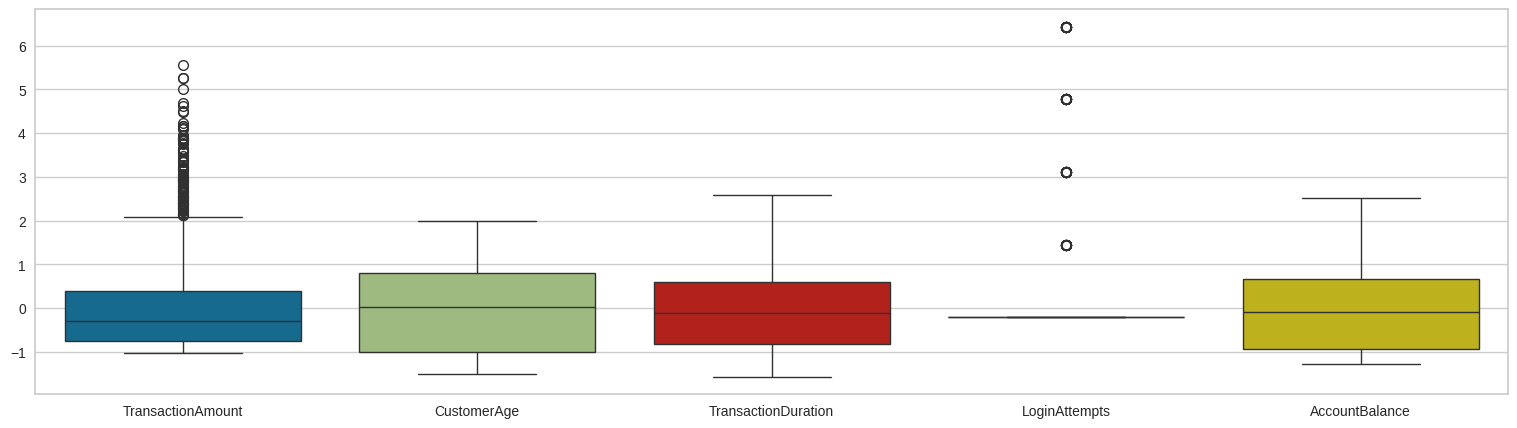

In [ ]:
# Mendeteksi Outlier
plt.figure(figsize=(19,5))
sns.boxplot(data=df_bank[['TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate']])
plt.show()

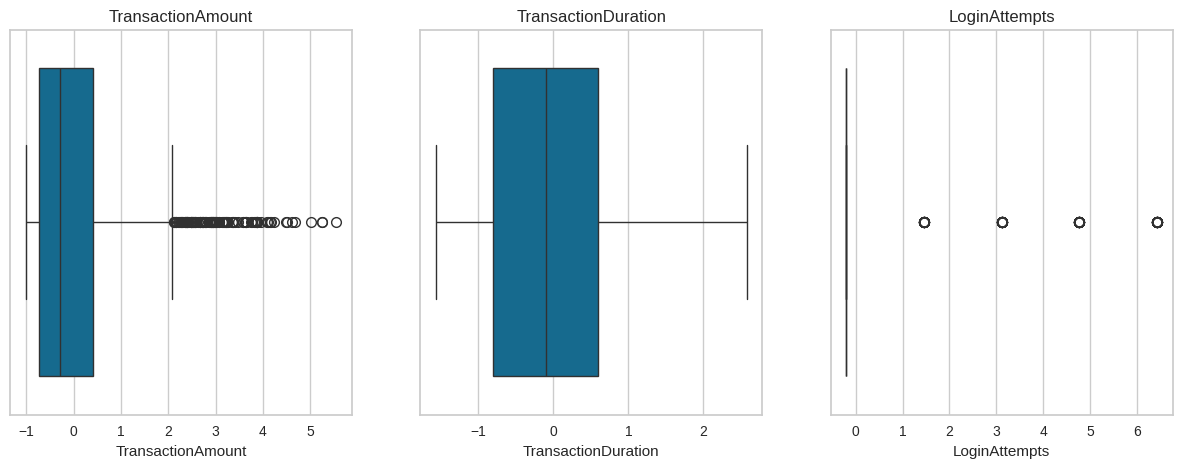

In [ ]:
features = ['TransactionAmount', 'TransactionDuration', 'LoginAttempts']

plt.figure(figsize=(15, 5))
for i, col in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df_bank[col])
    plt.title(col)

plt.show()

In [ ]:
# Encoding data
label_encoders = {}
for column in df_bank.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_bank[column] = le.fit_transform(df_bank[column])
    label_encoders[column] = le
print(df_bank.head())

   TransactionAmount     TransactionDate  TransactionType  Location  \
0          -0.971275 2023-04-11 16:29:14                1        36   
1           0.269440 2023-06-27 16:44:19                1        15   
2          -0.586882 2023-07-10 18:16:08                1        23   
3          -0.387456 2023-05-05 16:32:11                1        33   
4          -0.973468 2023-10-16 17:51:24                0         1   

   IP Address  Channel  CustomerAge  CustomerOccupation  TransactionDuration  \
0         186        0     1.423718                   0            -0.552443   
1          82        0     1.311287                   0             0.305314   
2         343        2    -1.443277                   3            -0.909842   
3         300        2    -1.049768                   3            -1.353017   
4         501        2    -1.049768                   3             1.120184   

   LoginAttempts  AccountBalance PreviousTransactionDate  
0      -0.206794       -0.000537 

array([[<Axes: title={'center': 'TransactionAmount'}>,
        <Axes: title={'center': 'TransactionDate'}>,
        <Axes: title={'center': 'TransactionType'}>],
       [<Axes: title={'center': 'Location'}>,
        <Axes: title={'center': 'IP Address'}>,
        <Axes: title={'center': 'Channel'}>],
       [<Axes: title={'center': 'CustomerAge'}>,
        <Axes: title={'center': 'CustomerOccupation'}>,
        <Axes: title={'center': 'TransactionDuration'}>],
       [<Axes: title={'center': 'LoginAttempts'}>,
        <Axes: title={'center': 'AccountBalance'}>,
        <Axes: title={'center': 'PreviousTransactionDate'}>]],
      dtype=object)

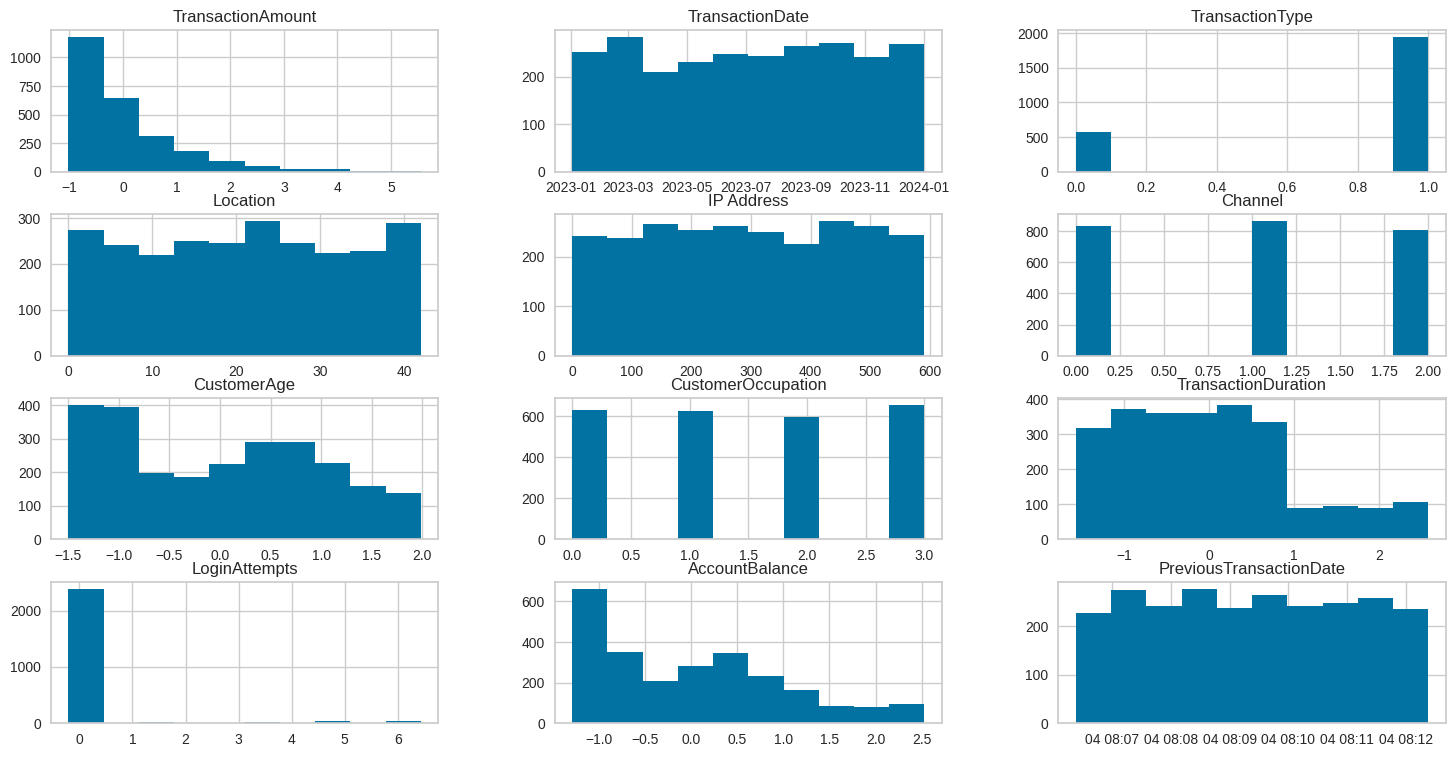

In [ ]:
df_bank.hist(figsize=(18,9))

In [ ]:
# Cek apakah ada NaN sebelum binning
print("Cek NaN sebelum binning:")
print(df_bank[['TransactionAmount', 'TransactionDuration', 'LoginAttempts']].isna().sum())

# Konversi ke numerik untuk memastikan tidak ada tipe data yang salah
df_bank['TransactionAmount'] = pd.to_numeric(df_bank['TransactionAmount'], errors='coerce')
df_bank['TransactionDuration'] = pd.to_numeric(df_bank['TransactionDuration'], errors='coerce')
df_bank['LoginAttempts'] = pd.to_numeric(df_bank['LoginAttempts'], errors='coerce')

# Isi NaN dengan median lagi setelah konversi
num_cols = ['TransactionAmount', 'TransactionDuration', 'LoginAttempts']
df_bank[num_cols] = df_bank[num_cols].fillna(df_bank[num_cols].median())

# Cek apakah ada nilai yang di luar rentang bins
print("\nCek nilai minimum dan maksimum:")
print(df_bank[num_cols].describe())

# Lakukan binning ulang setelah perbaikan data
bins_amount = [0, 100, 1000, float('inf')]
labels_amount = ['Kecil', 'Sedang', 'Besar']
df_bank['TransactionAmount_Bin'] = pd.cut(df_bank['TransactionAmount'], bins=bins_amount, labels=labels_amount, right=False)

bins_duration = [0, 5, 30, float('inf')]
labels_duration = ['Cepat', 'Sedang', 'Lama']
df_bank['TransactionDuration_Bin'] = pd.cut(df_bank['TransactionDuration'], bins=bins_duration, labels=labels_duration, right=False)

bins_attempts = [0, 3, 5, float('inf')]
labels_attempts = ['Normal', 'Mencurigakan', 'Ekstrem']
df_bank['LoginAttempts_Bin'] = pd.cut(df_bank['LoginAttempts'], bins=bins_attempts, labels=labels_attempts, right=False)

# Cek hasil binning
print("\nCek hasil binning:")
print(df_bank[['TransactionAmount', 'TransactionAmount_Bin',
               'TransactionDuration', 'TransactionDuration_Bin',
               'LoginAttempts', 'LoginAttempts_Bin']].head())


Cek NaN sebelum binning:
TransactionAmount      0
TransactionDuration    0
LoginAttempts          0
dtype: int64

Cek nilai minimum dan maksimum:
       TransactionAmount  TransactionDuration  LoginAttempts
count       2.512000e+03         2.512000e+03   2.512000e+03
mean       -1.414297e-16         7.637203e-17   1.527441e-16
std         1.000199e+00         1.000199e+00   1.000199e+00
min        -1.018657e+00        -1.567456e+00  -2.067936e-01
25%        -7.390118e-01        -8.097706e-01  -2.067936e-01
50%        -2.961881e-01        -1.021205e-01  -2.067936e-01
75%         4.006114e-01         5.912336e-01  -2.067936e-01
max         5.555266e+00         2.578372e+00   6.431745e+00

Cek hasil binning:
   TransactionAmount TransactionAmount_Bin  TransactionDuration  \
0          -0.971275                   NaN            -0.552443   
1           0.269440                 Kecil             0.305314   
2          -0.586882                   NaN            -0.909842   
3          -0.387

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering dengan K-Means**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
print(df_bank.dtypes)

TransactionAmount                 float64
TransactionDate            datetime64[ns]
TransactionType                     int64
Location                            int64
IP Address                          int64
Channel                             int64
CustomerAge                       float64
CustomerOccupation                  int64
TransactionDuration               float64
LoginAttempts                     float64
AccountBalance                    float64
PreviousTransactionDate    datetime64[ns]
TransactionAmount_Bin            category
TransactionDuration_Bin          category
LoginAttempts_Bin                category
dtype: object


In [ ]:
df_bank['TransactionDate'] = pd.to_datetime(df_bank['TransactionDate'])  # Ubah ke format waktu
df_bank['TransactionDate'] = (df_bank['TransactionDate'] - df_bank['TransactionDate'].min()).dt.total_seconds()

In [ ]:
df_bank['PreviousTransactionDate'] = pd.to_datetime(df_bank['PreviousTransactionDate'])  # Ubah ke format waktu
df_bank['PreviousTransactionDate'] = (df_bank['PreviousTransactionDate'] - df_bank['PreviousTransactionDate'].min()).dt.total_seconds()

In [ ]:
# Mengubah data yang suda proses binning ke data numerik
df_bank['TransactionAmount_Bin'] = df_bank['TransactionAmount_Bin'].astype('category').cat.codes
df_bank['TransactionDuration_Bin'] = df_bank['TransactionDuration_Bin'].astype('category').cat.codes
df_bank['LoginAttempts_Bin'] = df_bank['LoginAttempts_Bin'].astype('category').cat.codes

In [ ]:
print(df_bank.dtypes)

TransactionAmount          float64
TransactionDate            float64
TransactionType              int64
Location                     int64
IP Address                   int64
Channel                      int64
CustomerAge                float64
CustomerOccupation           int64
TransactionDuration        float64
LoginAttempts              float64
AccountBalance             float64
PreviousTransactionDate    float64
TransactionAmount_Bin         int8
TransactionDuration_Bin       int8
LoginAttempts_Bin             int8
dtype: object


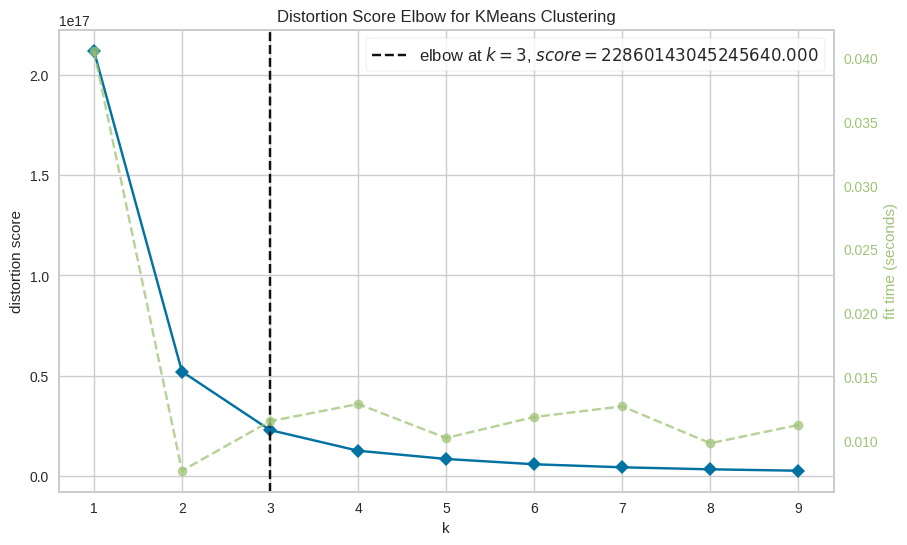

In [ ]:
# Menggunakan metode Elbow untuk menentukan jumlah cluster optimal
plt.figure(figsize=(10, 6))
visualizer = KElbowVisualizer(KMeans(random_state=42), k=(1, 10))
visualizer.fit(df_bank)
visualizer.show()
optimal_k = visualizer.elbow_value_

For n_clusters = 3, silhouette score is 0.5969026554569898
For n_clusters = 4, silhouette score is 0.5868422234693214
For n_clusters = 5, silhouette score is 0.5607434027455737
For n_clusters = 6, silhouette score is 0.556754988299816
For n_clusters = 7, silhouette score is 0.5490607748449304
For n_clusters = 8, silhouette score is 0.5518537380247385
For n_clusters = 9, silhouette score is 0.5462328903731271
For n_clusters = 10, silhouette score is 0.5446583700654323


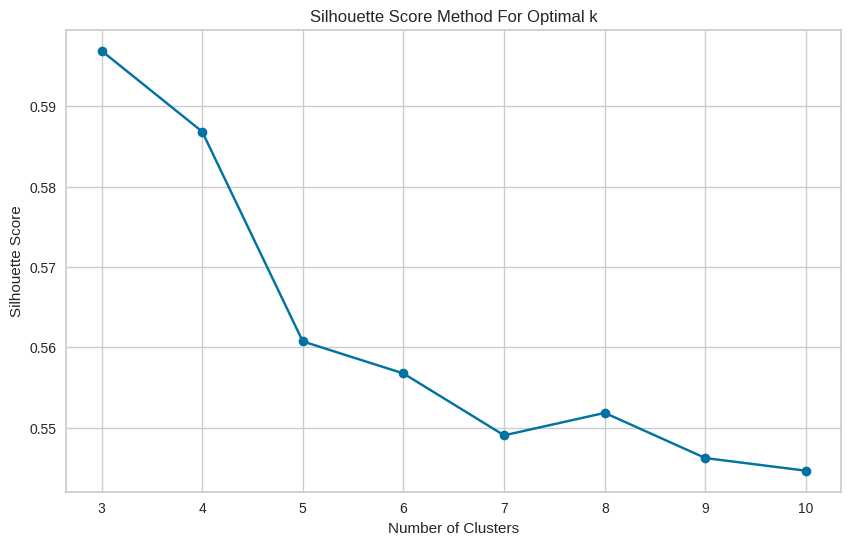

In [ ]:
silhouette_scores = []
for k in range(3, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_bank)
    score = silhouette_score(df_bank, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"For n_clusters = {k}, silhouette score is {score}")

plt.figure(figsize=(10, 6))
plt.plot(range(3, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method For Optimal k')
plt.show()

In [ ]:
# Membangun model K-Means dengan jumlah cluster optimal
optimal_k = 3 # Ganti dengan hasil dari metode Elbow atau silhouette
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(df_bank)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [ ]:
# Menambahkan label cluster ke dataset
df_bank['Cluster_KMeans'] = kmeans.labels_

## **Pembangunan Model DBSCAN untuk deteksi anomali**

In [ ]:
# DBSCAN sangat baik untuk deteksi anomali dalam data transaksi
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Parameter ini perlu disesuaikan dengan data Anda
clusters_dbscan = dbscan.fit_predict(df_bank)

In [ ]:
# Menambahkan hasil clustering DBSCAN ke dataframe
df_bank['Cluster_DBSCAN'] = clusters_dbscan

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
# Menghitung Silhouette Score untuk model K-Means
final_silhouette_score = silhouette_score(df_bank, kmeans.labels_)
print(f"Silhouette Score for {optimal_k} clusters (KMeans): {final_silhouette_score}")

Silhouette Score for 3 clusters (KMeans): 0.596902655456995


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
# Kurangi dimensi fitur menjadi 2
pca = PCA(n_components=2)
df_bank_pca = pca.fit_transform(df_bank)

# Cek seberapa banyak informasi yang dipertahankan
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [1.00000000e+00 3.40681744e-10]


In [ ]:
# Membangun model K-Means dengan fitur yang dipilih
kmeans_new = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_new.fit(df_bank_pca)

KMeans(n_clusters=3, random_state=42)

In [ ]:
# Menghitung Silhouette Score untuk model dengan fitur yang dipilih
new_silhouette_score = silhouette_score(df_bank_pca, kmeans_new.labels_)
print(f"Silhouette Score with selected features: {new_silhouette_score}")

Silhouette Score with selected features: 0.5969026696274923


In [ ]:
# Membandingkan hasil
print(f"Improvement: {new_silhouette_score - final_silhouette_score}")

Improvement: 1.4170497331100762e-08


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [ ]:
pca = PCA(n_components=2)
df_bank_pca = pca.fit_transform(df_bank)
df_bank_pca = pd.DataFrame(data=df_bank_pca, columns=['PC1', 'PC2'])
df_bank_pca['Cluster_KMeans'] = kmeans.labels_
df_bank_pca['Cluster_DBSCAN'] = clusters_dbscan
df_bank_pca['Is_Anomaly'] = clusters_dbscan == -1

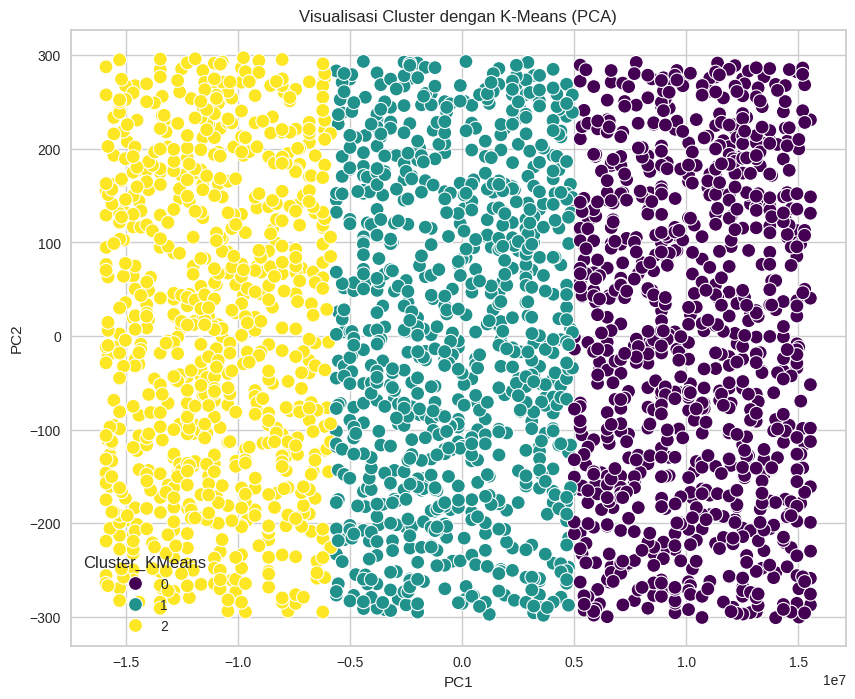

In [ ]:
# Visualisasi hasil K-Means
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster_KMeans', data=df_bank_pca, palette='viridis', s=100)
plt.title('Visualisasi Cluster dengan K-Means (PCA)')
plt.show()

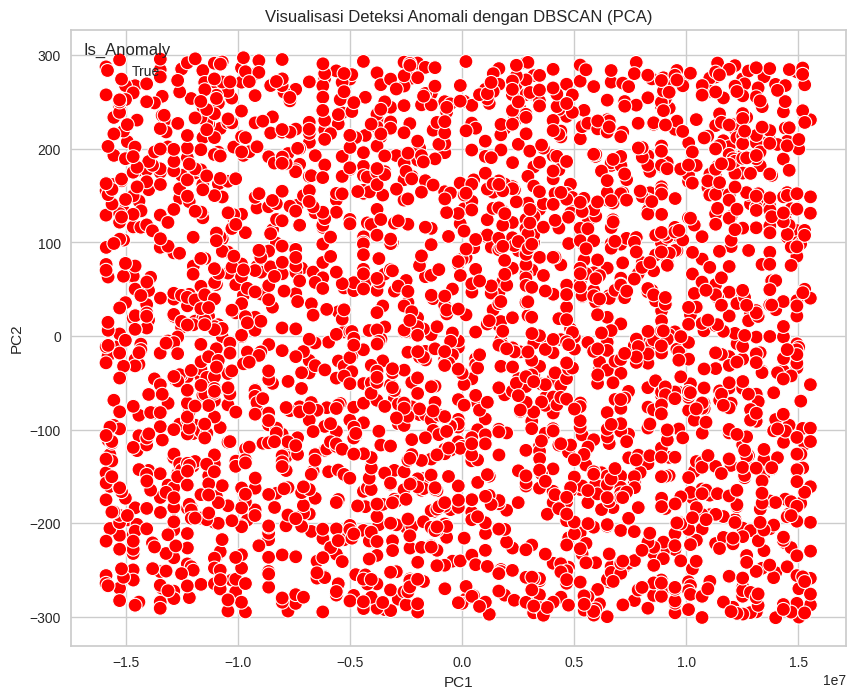

In [ ]:
# Visualisasi hasil DBSCAN (potential fraud identification)
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Is_Anomaly', data=df_bank_pca, palette={False: 'blue', True: 'red'}, s=100)
plt.title('Visualisasi Deteksi Anomali dengan DBSCAN (PCA)')
plt.show()

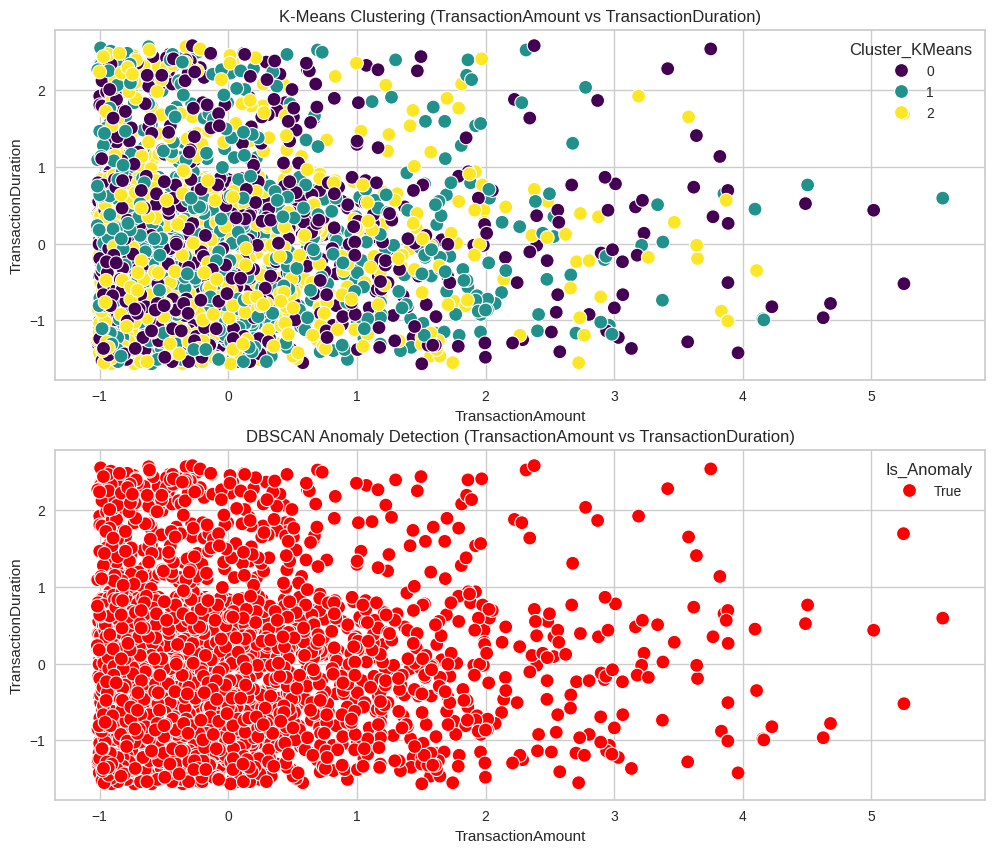

<Figure size 1200x1000 with 0 Axes>

In [ ]:
# Visualisasi cluster dengan scatter plot langsung (jika fitur = 2 atau 3)
if len(features) >= 2:
    plt.figure(figsize=(12, 10))
    plt.subplot(2, 1, 1)
    sns.scatterplot(x=features[0], y=features[1], hue='Cluster_KMeans', data=df_bank, palette='viridis', s=100)
    plt.title(f'K-Means Clustering ({features[0]} vs {features[1]})')

    plt.subplot(2, 1, 2)
    sns.scatterplot(x=features[0], y=features[1], hue='Is_Anomaly', data=df_bank.assign(Is_Anomaly=clusters_dbscan == -1),
                    palette={False: 'blue', True: 'red'}, s=100)
    plt.title(f'DBSCAN Anomaly Detection ({features[0]} vs {features[1]})')
    plt.show()

if len(features) >= 3:
    fig = plt.figure(figsize=(12, 10))


Text(0.5, 0.92, 'Visualisasi 3D K-Means (TransactionAmount vs TransactionDuration vs LoginAttempts)')

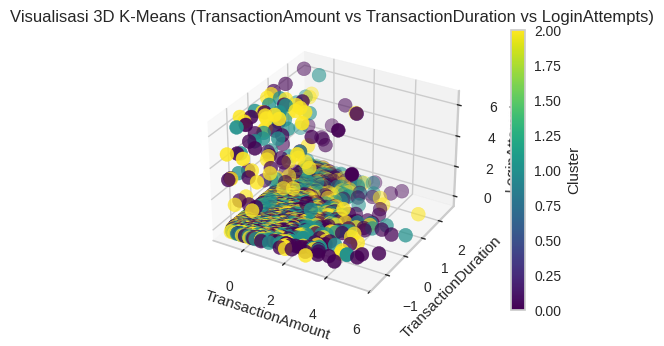

In [ ]:
# Visualisasi K-Means
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(211, projection='3d')
scatter = ax.scatter(df_bank[features[0]],
                     df_bank[features[1]],
                      df_bank[features[2]],
                      c=df_bank['Cluster_KMeans'],
                      cmap='viridis',
                      s=100)
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[2])
plt.colorbar(scatter, label='Cluster')
plt.title(f'Visualisasi 3D K-Means ({features[0]} vs {features[1]} vs {features[2]})')

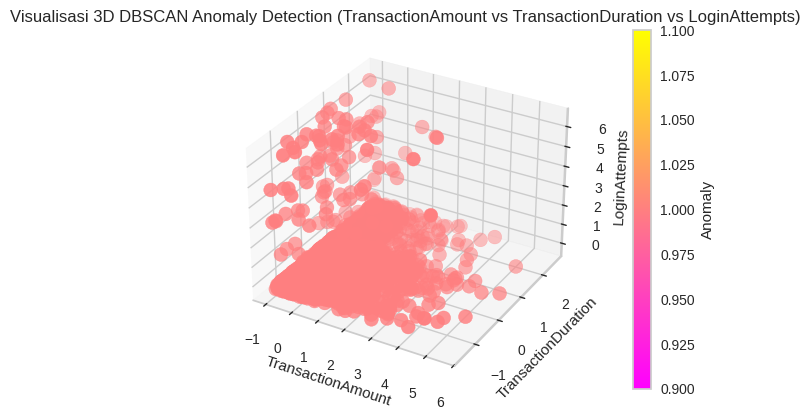

In [ ]:
# Visualisasi DBSCAN
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(212, projection='3d')
scatter = ax.scatter(df_bank[features[0]],
                    df_bank[features[1]],
                    df_bank[features[2]],
                    c=df_bank['Cluster_DBSCAN'] == -1,
                    cmap='spring',
                    s=100)
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[2])
plt.colorbar(scatter, label='Anomaly')
plt.title(f'Visualisasi 3D DBSCAN Anomaly Detection ({features[0]} vs {features[1]} vs {features[2]})')
plt.tight_layout()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
df_bank['Cluster'] = kmeans.labels_

In [ ]:
for column in label_encoders:
    df_bank[column] = label_encoders[column].fit_transform(df_bank[column])


In [ ]:
# Inverse Transform untuk mengembalikan data ke bentuk asli
df_bank = df_bank.copy()
df_bank['Cluster_KMeans'] = kmeans.labels_
df_bank['Cluster_DBSCAN'] = clusters_dbscan
df_bank['Is_Anomaly'] = clusters_dbscan == -1

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
for column, le in label_encoders.items():
    if column in df_bank.columns:
        df_bank[f'Original_{column}'] = le.inverse_transform(df_bank[column].astype(int))

In [ ]:
df_bank[features] = scaler.inverse_transform(df_bank[features])

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
# Analisis karakteristik cluster K-Means
cluster_stats = df_bank.groupby('Cluster_KMeans')[features].mean()
print("\nKarakteristik Rata-rata untuk Setiap Cluster K-Means:")
print(cluster_stats)


Karakteristik Rata-rata untuk Setiap Cluster K-Means:
                TransactionAmount  TransactionDuration  LoginAttempts
Cluster_KMeans                                                       
0                        0.031553             0.034766       0.001133
1                        0.005936             0.004394      -0.044926
2                       -0.041833            -0.043759       0.047556


In [ ]:
# Analisis Karakteristik Anomali vs Normal
anomaly_stats = df_bank.groupby('Is_Anomaly')[features].mean()
print("\nKarakteristik Rata-rata: Normal vs Anomali:")
print(anomaly_stats)


Karakteristik Rata-rata: Normal vs Anomali:
            TransactionAmount  TransactionDuration  LoginAttempts
Is_Anomaly                                                       
True            -2.833676e-16         1.322147e-16   2.746498e-16


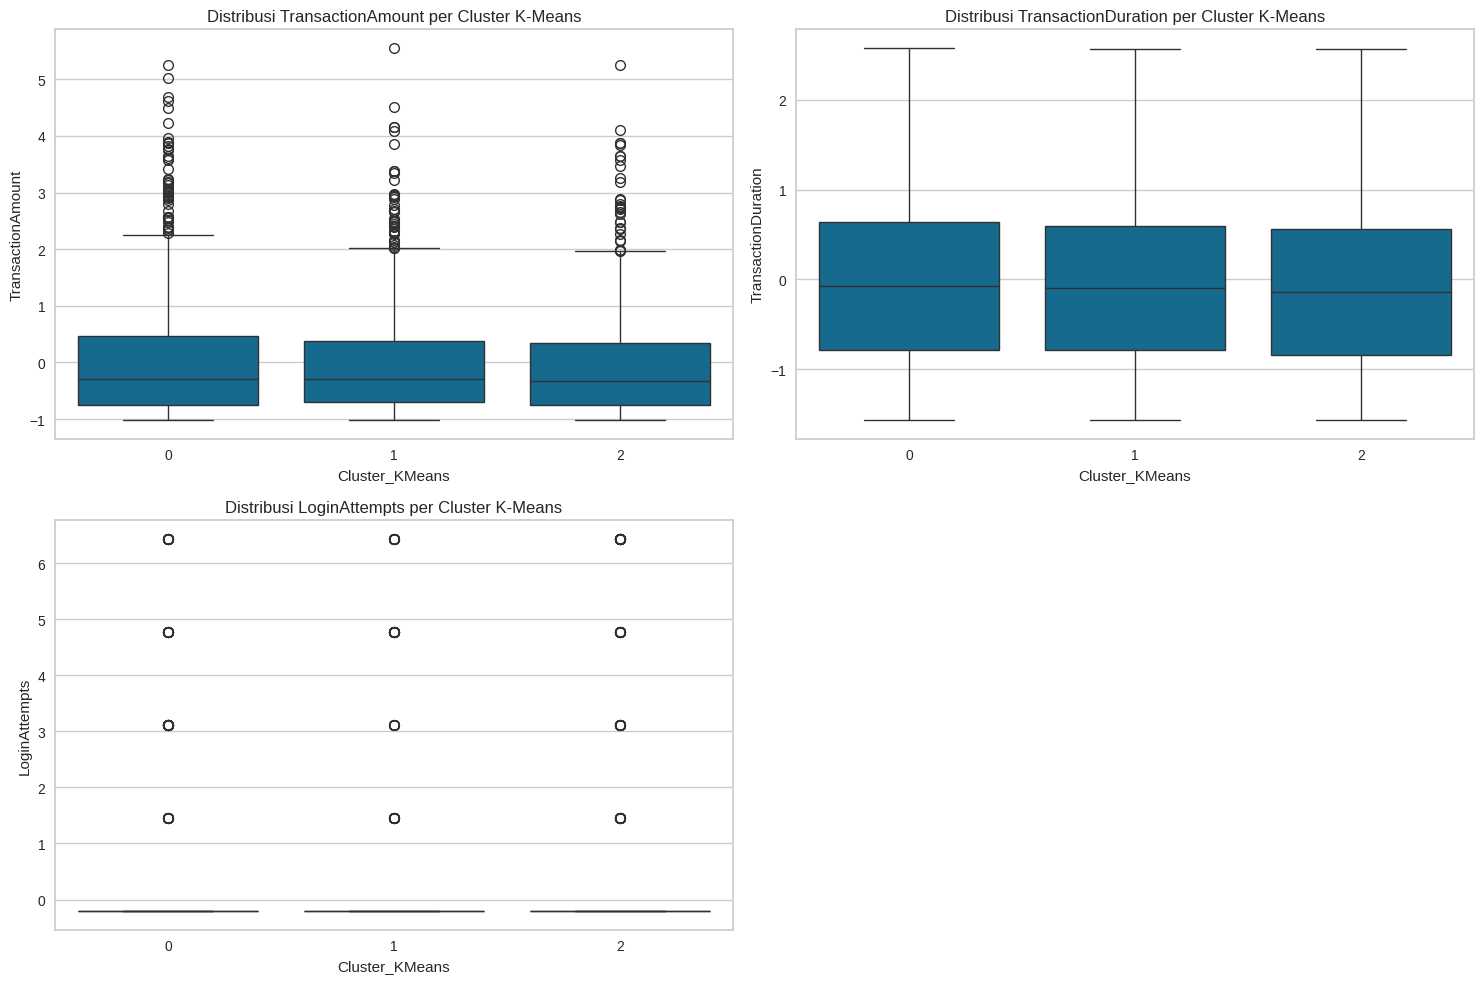

In [ ]:
# Visualisasi Karakteristik Cluster
num_features = len(features)  # Hitung jumlah fitur
rows = math.ceil(num_features / 2)  # Menentukan jumlah baris agar cukup menampung semua subplot
cols = 2  # Menentukan jumlah kolom

plt.figure(figsize=(15, 5 * rows))  # Atur tinggi gambar agar menyesuaikan

for i, col in enumerate(features):
    plt.subplot(rows, cols, i + 1)  # Pastikan indeks subplot valid
    sns.boxplot(x='Cluster_KMeans', y=col, data=df_bank)
    plt.title(f'Distribusi {col} per Cluster K-Means')

plt.tight_layout()
plt.show()


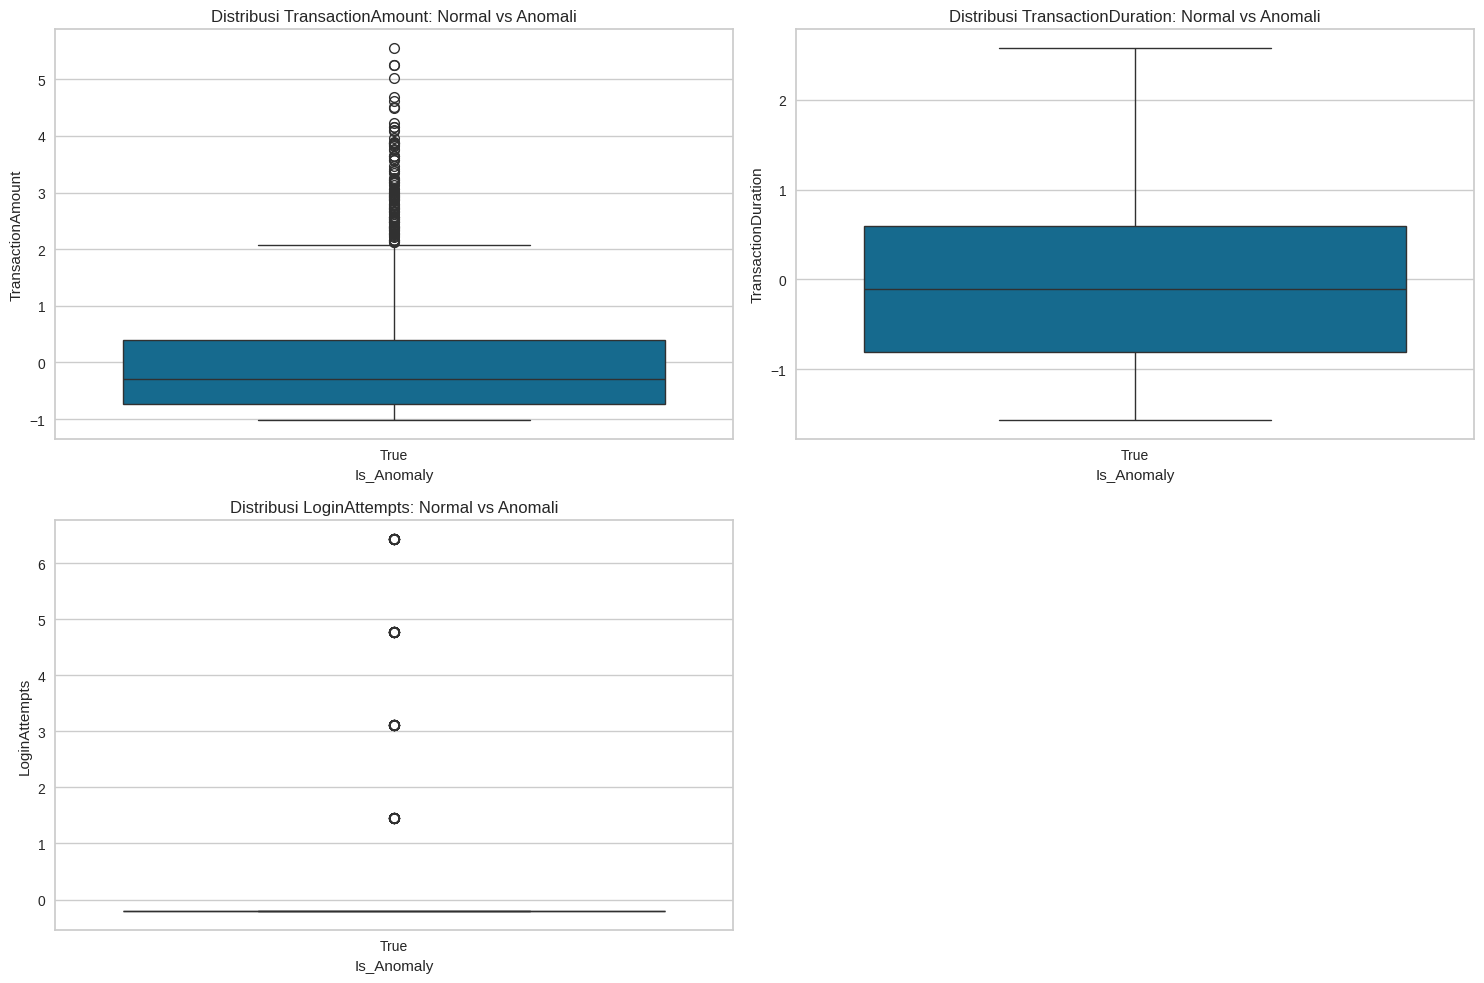

In [ ]:
import math

num_features = len(features)  # Hitung jumlah fitur
rows = math.ceil(num_features / 2)  # Menentukan jumlah baris agar cukup menampung semua subplot
cols = 2  # Menentukan jumlah kolom

plt.figure(figsize=(15, 5 * rows))  # Atur tinggi gambar agar menyesuaikan

for i, col in enumerate(features):
    plt.subplot(rows, cols, i + 1)  # Pastikan indeks subplot valid
    sns.boxplot(x='Is_Anomaly', y=col, data=df_bank)
    plt.title(f'Distribusi {col}: Normal vs Anomali')

plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

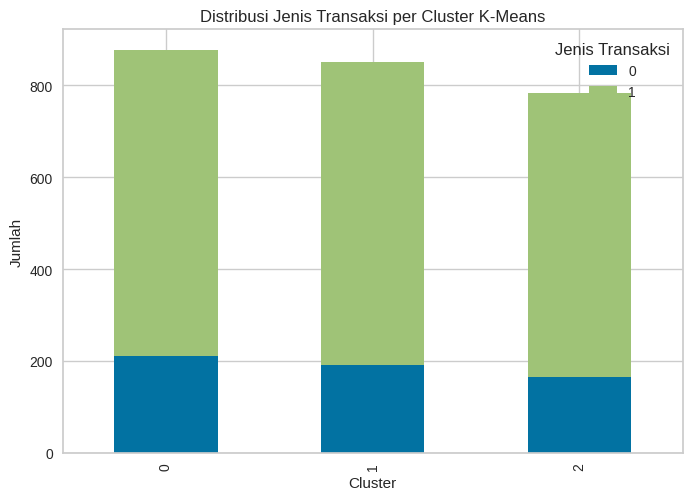

<Figure size 1200x600 with 0 Axes>

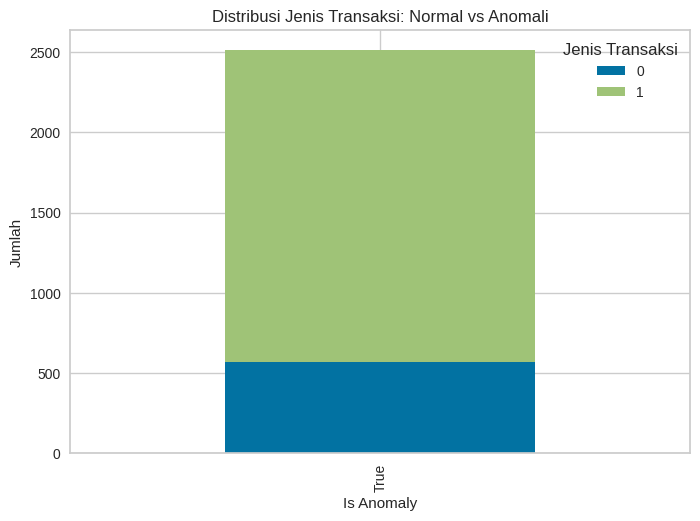

In [ ]:
# Distribusi Fitur Kategorikal per Cluster
if 'TransactionType' in df_bank.columns:
    plt.figure(figsize=(12, 6))
    cross_tab = pd.crosstab(df_bank['Cluster_KMeans'], df_bank['TransactionType'])
    cross_tab.plot(kind='bar', stacked=True)
    plt.title('Distribusi Jenis Transaksi per Cluster K-Means')
    plt.xlabel('Cluster')
    plt.ylabel('Jumlah')
    plt.legend(title='Jenis Transaksi')
    plt.show()

    # Distribusi TransactionType untuk anomali vs normal
    plt.figure(figsize=(12, 6))
    cross_tab_anomaly = pd.crosstab(df_bank['Is_Anomaly'], df_bank['TransactionType'])
    cross_tab_anomaly.plot(kind='bar', stacked=True)
    plt.title('Distribusi Jenis Transaksi: Normal vs Anomali')
    plt.xlabel('Is Anomaly')
    plt.ylabel('Jumlah')
    plt.legend(title='Jenis Transaksi')
    plt.show()

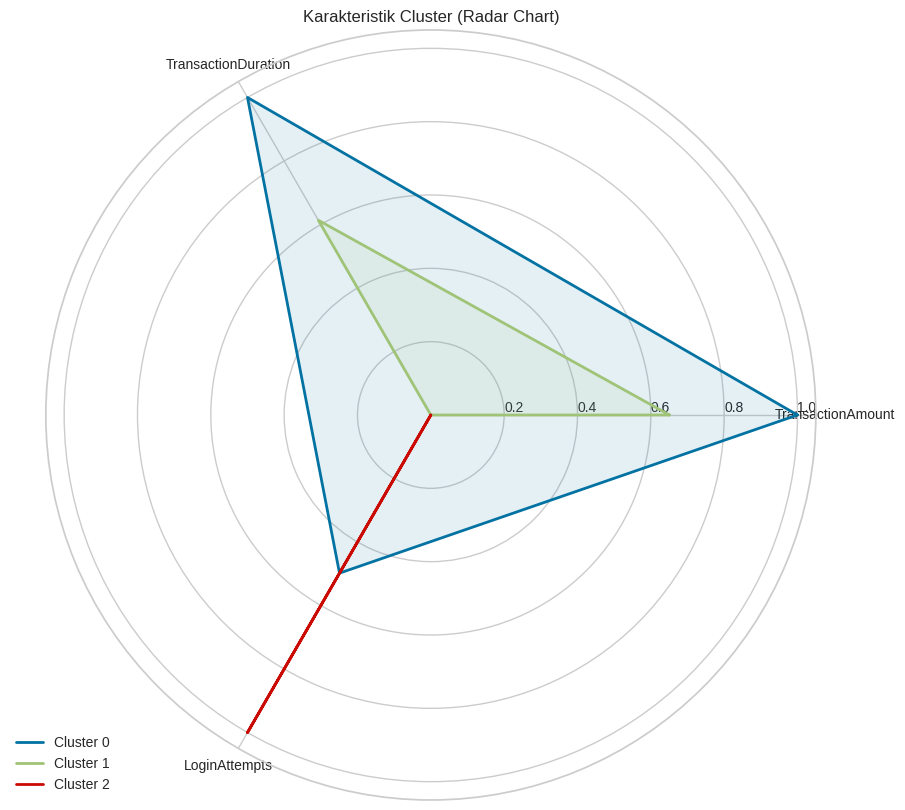

In [ ]:
# Radar Chart untuk Karakteristik Cluster
from math import pi
categories = features
N = len(categories)

# Menghitung rata-rata setiap fitur per cluster
cluster_means = df_bank.groupby('Cluster_KMeans')[categories].mean()

# Normalisasi untuk radar chart
cluster_means_norm = (cluster_means - cluster_means.min()) / (cluster_means.max() - cluster_means.min())

# Membuat radar chart
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

for i, cluster in enumerate(cluster_means_norm.index):
    values = cluster_means_norm.loc[cluster].values.tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Cluster {cluster}')
    ax.fill(angles, values, alpha=0.1)

plt.xticks(angles[:-1], categories)
ax.set_rlabel_position(0)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Karakteristik Cluster (Radar Chart)')
plt.show()


In [ ]:
print("X_scaled shape:", X_scaled.shape)  # Ukuran data yang digunakan untuk clustering
print("Centroid shape:", kmeans.cluster_centers_.shape)  # Ukuran centroid K-Means


X_scaled shape: (2512, 5)
Centroid shape: (3, 15)


In [ ]:
# Scoring & Deteksi Kecurangan
df_bank['Fraud_Score'] = 0

# Anomali dari DBSCAN diberi skor tinggi
df_bank.loc[df_bank['Is_Anomaly'], 'Fraud_Score'] = 100

# Menentukan skor berdasarkan jarak dari centroid K-Means
for i in range(len(df_bank)):
    cluster_id = df_bank.iloc[i]['Cluster_KMeans']
    data_point = X_scaled[i]
    centroid = kmeans.cluster_centers_[cluster_id]


    # Jika bukan anomali DBSCAN, update skor berdasarkan jarak
    if not df_bank.iloc[i]['Is_Anomaly']:
        max_distance = np.max([np.linalg.norm(X_scaled[j] - kmeans.cluster_centers_[df_bank.iloc[j]['Cluster_KMeans']])
                               for j in range(len(df_bank)) if not df_bank.iloc[j]['Is_Anomaly']])
        df_bank.loc[df_bank.index[i], 'Fraud_Score'] = min(80, (distance / max_distance) * 80)

# Menampilkan transaksi dengan skor kecurangan tertinggi
print("\nTransaksi dengan skor kecurangan tertinggi (potensial fraud):")
suspicious_transactions = df_bank.sort_values('Fraud_Score', ascending=False).head(10)
print(suspicious_transactions[features + ['Cluster_KMeans', 'Cluster_DBSCAN', 'Fraud_Score']])



Transaksi dengan skor kecurangan tertinggi (potensial fraud):
      TransactionAmount  TransactionDuration  LoginAttempts  Cluster_KMeans  \
2495          -0.090356            -0.466667      -0.206794               2   
2494           0.466981            -1.181466      -0.206794               2   
2493           1.916166             0.433978      -0.206794               2   
2492          -0.103169             0.562642       1.452841               2   
2491          -0.453200            -1.310129      -0.206794               2   
2490          -0.464198             1.448991      -0.206794               0   
2489           0.380373             0.562642      -0.206794               1   
2488          -0.957537            -0.766883      -0.206794               2   
2487          -0.834202            -1.467385      -0.206794               1   
2486           0.272180            -0.795475      -0.206794               2   

      Cluster_DBSCAN  Fraud_Score  
2495              -1          1

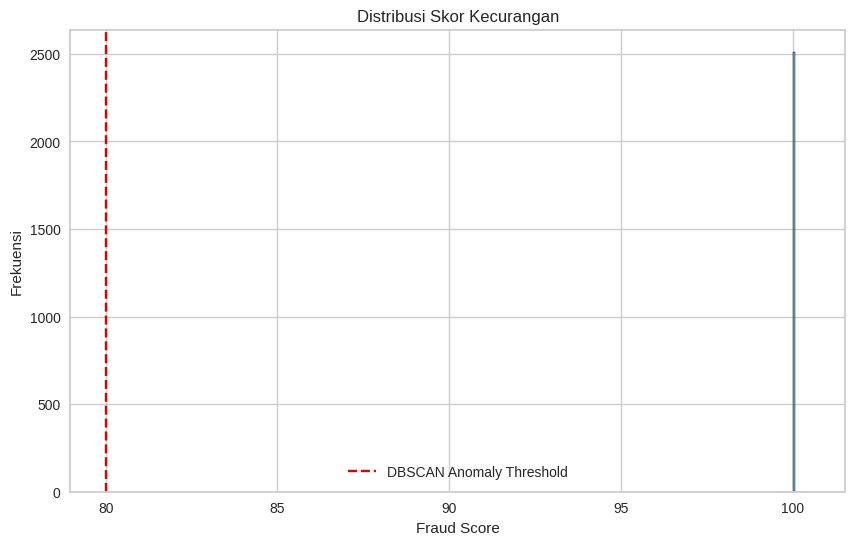

In [ ]:
# Visualisasi Skor Kecurangan
plt.figure(figsize=(10, 6))
sns.histplot(df_bank['Fraud_Score'], bins=20, kde=True)
plt.axvline(x=80, color='r', linestyle='--', label='DBSCAN Anomaly Threshold')
plt.title('Distribusi Skor Kecurangan')
plt.xlabel('Fraud Score')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()


In [ ]:
# Simpan Data Hasil Deteksi Kecurangan
df_bank.to_csv('fraud_detection_results.csv', index=False)
print("Data hasil deteksi kecurangan telah disimpan ke 'fraud_detection_results.csv'")

# Simpan informasi model
model_info = {
    'kmeans_centers': kmeans.cluster_centers_.tolist(),
    'dbscan_eps': dbscan.eps,
    'dbscan_min_samples': dbscan.min_samples,
    'features': features,
    'scaler_mean': scaler.mean_.tolist(),
    'scaler_scale': scaler.scale_.tolist()
}

import json
with open('fraud_detection_model_info.json', 'w') as f:
    json.dump(model_info, f)
print("Informasi model telah disimpan ke 'fraud_detection_model_info.json'")


Data hasil deteksi kecurangan telah disimpan ke 'fraud_detection_results.csv'
Informasi model telah disimpan ke 'fraud_detection_model_info.json'


Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.